# Contraceptive Method Choice

In [12]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import dataset

**original dataset info**

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use, 2=Long-term, 3=Short-term **<=**
   
**_Notes_**
- Column #10 is to be predicted.
- I'm going to change columns names and invert some of the values, as they don't correspond to common notation (e.g. #5,6,9)

In [3]:
path_to_data_set = os.path.join("UCI_datasets", "cmc", "cmc.data")

names = {
    "W_AGE"                  : 'int8',
    "W_EDU"                  : 'category',
    "H_EDU"                  : 'category',
    "NUM_CHILDREN"           : 'int8',
    "W_ISLAM"                : 'bool',
    "W_WORKING"              : 'bool',
    "H_JOB"                  : 'category',
    "SOL"                    : 'category',
    "BAD_MEDIA"              : 'bool',
    "CONT_USAGE"             : 'category'
}

table = pd.read_table(path_to_data_set, delimiter=",",  
                      header=None, index_col=False, 
                      names=names.keys(),
                      dtype=names,
                      engine='python'
                     )

In [4]:
table.head()

,W_AGE,W_EDU,H_EDU,NUM_CHILDREN,W_ISLAM,W_WORKING,H_JOB,SOL,BAD_MEDIA,CONT_USAGE
0,24,2,3,3,True,True,2,3,False,1
1,45,1,3,10,True,True,3,4,False,1
2,43,2,3,7,True,True,3,4,False,1
3,42,3,2,9,True,True,3,3,False,1
4,36,3,3,8,True,True,3,2,False,1


inverting values of columns

In [5]:
table["W_WORKING"] = table["W_WORKING"].apply(lambda x: not x)
# table["W_ISLAM"] = table["W_ISLAM"].apply(lambda x: not x)

### Data visualization

#### Unique values

In [6]:
for x in table.columns:
    print(x)
    print(table[x].unique())

W_AGE
[24 45 43 42 36 19 38 21 27 44 26 48 39 37 46 40 29 31 33 25 28 47 32 49
 34 20 22 30 23 35 41 17 18 16]
W_EDU
[2, 1, 3, 4]
Categories (4, object): [2, 1, 3, 4]
H_EDU
[3, 2, 4, 1]
Categories (4, object): [3, 2, 4, 1]
NUM_CHILDREN
[ 3 10  7  9  8  0  6  1  2  4  5 12 11 13 16]
W_ISLAM
[ True False]
W_WORKING
[False  True]
H_JOB
[2, 3, 1, 4]
Categories (4, object): [2, 3, 1, 4]
SOL
[3, 4, 2, 1]
Categories (4, object): [3, 4, 2, 1]
BAD_MEDIA
[False  True]
CONT_USAGE
[1, 2, 3]
Categories (3, object): [1, 2, 3]


#### Correlation matrix
It's only available for numeric values, but still worthy to have a look

In [24]:
corr_matrix = table.corr().round(2)

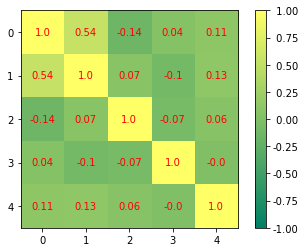

In [32]:
ig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='summer')
im.set_clim(-1, 1)
ax.grid(False)
# ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
# ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
# ax.set_ylim(2.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, corr_matrix.iloc[i, j], ha='center', va='center', color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

## Train model

## Model evaluation 

### Comparing trained models

`macro` is necessary for multilable classifiers

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_predict

def metrics(clf, X, Y, t_x, t_y):
    pred = cross_val_predict(clf, X, Y, cv=3)
    y_pred = clf.predict(t_x)
    
    print('Accuracy on test set: {}'.format(accuracy_score(t_y, y_pred)))
    print('F1: {}'.format(f1_score(Y, pred, average="macro")))
    print('Precision: {}'.format(precision_score(Y, pred, average="macro")))
    print('Recall: {}'.format(recall_score(Y, pred, average="macro")))

### ROC curves

In [ ]:


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))

knn_y_scores = cross_val_predict(knn_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, knn_y_scores)
plot_roc_curve(fpr, tpr, label='KNN')

gnb_y_scores = cross_val_predict(gnb_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, gnb_y_scores)
plot_roc_curve(fpr, tpr, label='Bayesian')

tree_y_scores = cross_val_predict(tree_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, tree_y_scores)
plot_roc_curve(fpr, tpr, label='Tree')

plt.legend(loc="lower right", fontsize=16)

plt.show()

from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))

knn_y_scores = cross_val_predict(knn_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, knn_y_scores)
plot_roc_curve(fpr, tpr, label='KNN')

gnb_y_scores = cross_val_predict(gnb_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, gnb_y_scores)
plot_roc_curve(fpr, tpr, label='Bayesian')

tree_y_scores = cross_val_predict(tree_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, tree_y_scores)
plot_roc_curve(fpr, tpr, label='Tree')

plt.legend(loc="lower right", fontsize=16)

plt.show()

### Comparing trained models

`macro` is necessary for multilable classifiers

In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_predict

def metrics(clf, X, Y, t_x, t_y):
    pred = cross_val_predict(clf, X, Y, cv=3)
    y_pred = clf.predict(t_x)
    
    print('Accuracy on test set: {}'.format(accuracy_score(t_y, y_pred)))
    print('F1: {}'.format(f1_score(Y, pred, average="macro")))
    print('Precision: {}'.format(precision_score(Y, pred, average="macro")))
    print('Recall: {}'.format(recall_score(Y, pred, average="macro")))

### ROC curves

In [ ]:


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

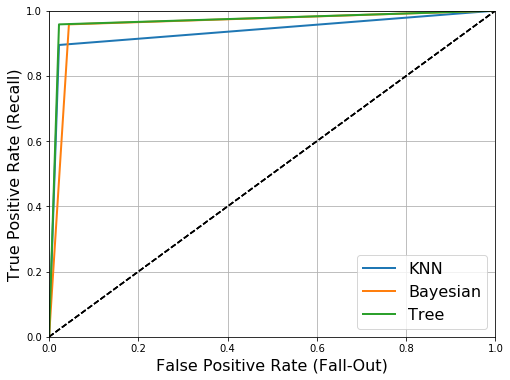

In [25]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))

knn_y_scores = cross_val_predict(knn_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, knn_y_scores)
plot_roc_curve(fpr, tpr, label='KNN')

gnb_y_scores = cross_val_predict(gnb_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, gnb_y_scores)
plot_roc_curve(fpr, tpr, label='Bayesian')

tree_y_scores = cross_val_predict(tree_clf1, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, tree_y_scores)
plot_roc_curve(fpr, tpr, label='Tree')

plt.legend(loc="lower right", fontsize=16)

plt.show()